In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from Linear_Regression.models.linear_regression import LinearRegression as LR
from Linear_Regression.models.regression_metrics import RegressionMetrics
from Linear_Regression.models.standard_scaler import StandardScaler as SC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
style.use("dark_background")

In [3]:
pd.set_option("display.max_columns", 20)
pd.set_option("expand_frame_repr", False)

In [4]:
df = pd.read_csv("../data/Student_Performance.csv")

print(df.head())
print(df.info())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  Sample Question Papers Practiced  Performance Index
0              7               99                        Yes            9                                 1               91.0
1              4               82                         No            4                                 2               65.0
2              8               51                        Yes            7                                 2               45.0
3              5               52                        Yes            5                                 2               36.0
4              7               75                         No            8                                 5               66.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   

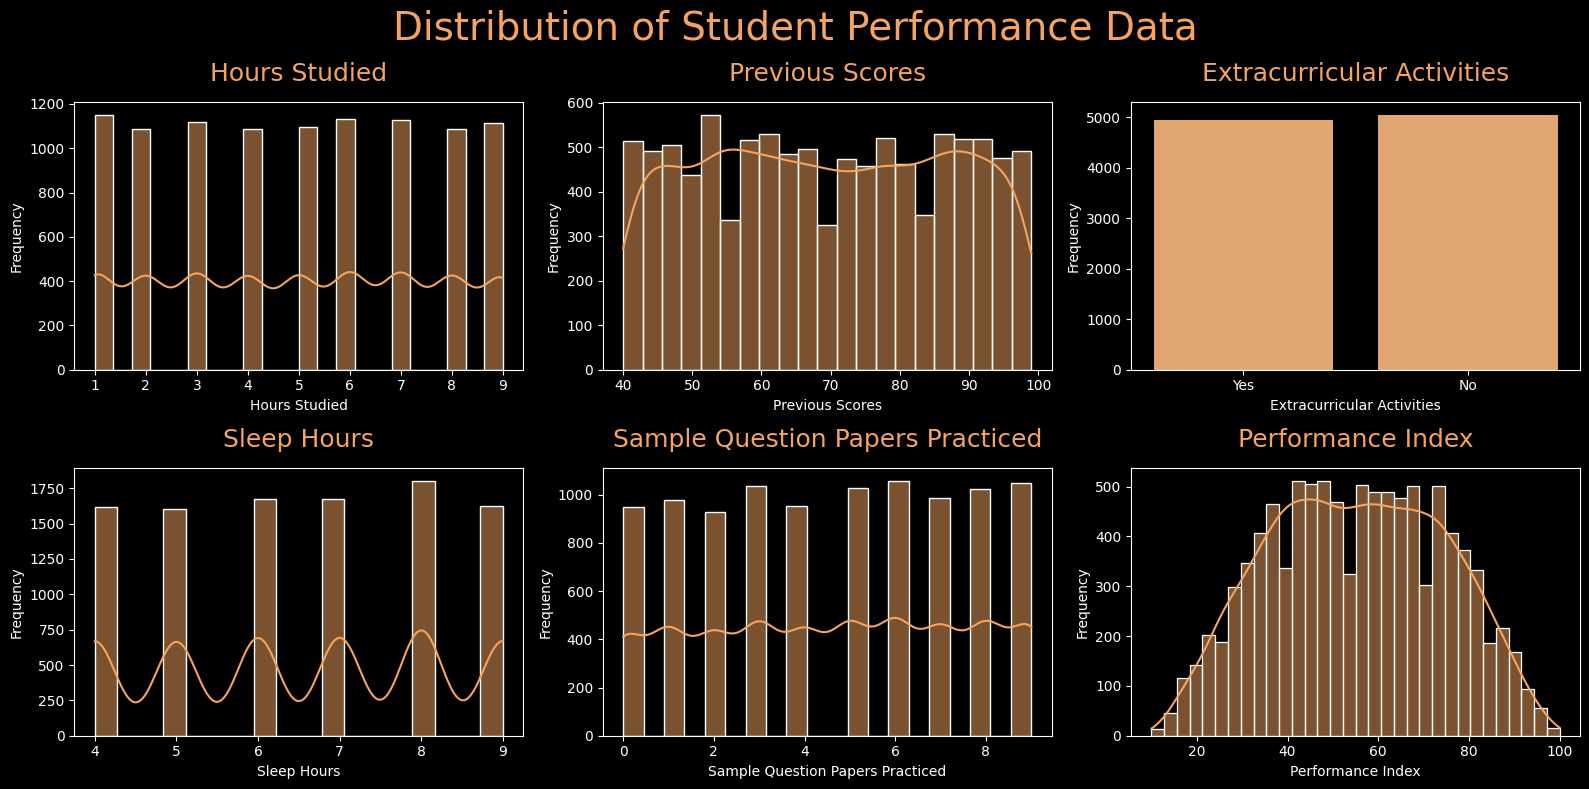

In [5]:
plt.figure(figsize=(16,8))

numeric_columns = df.select_dtypes(include=["number"]).columns

plt.suptitle("Distribution of Student Performance Data", color="sandybrown", fontsize=28)

for index, column in enumerate(df.columns):
    plt.subplot(2,3,index+1)

    if column in numeric_columns:
        sns.histplot(data=df, x=column, color="sandybrown", kde=True)
    else:
        sns.countplot(data=df, x=column, color="sandybrown")

    plt.title(column, fontdict={"fontsize": 18, "color": "sandybrown"}, pad=15)
    plt.xlabel(xlabel=column, fontsize=10)
    plt.ylabel(ylabel="Frequency", fontsize=10)
    plt.tight_layout()

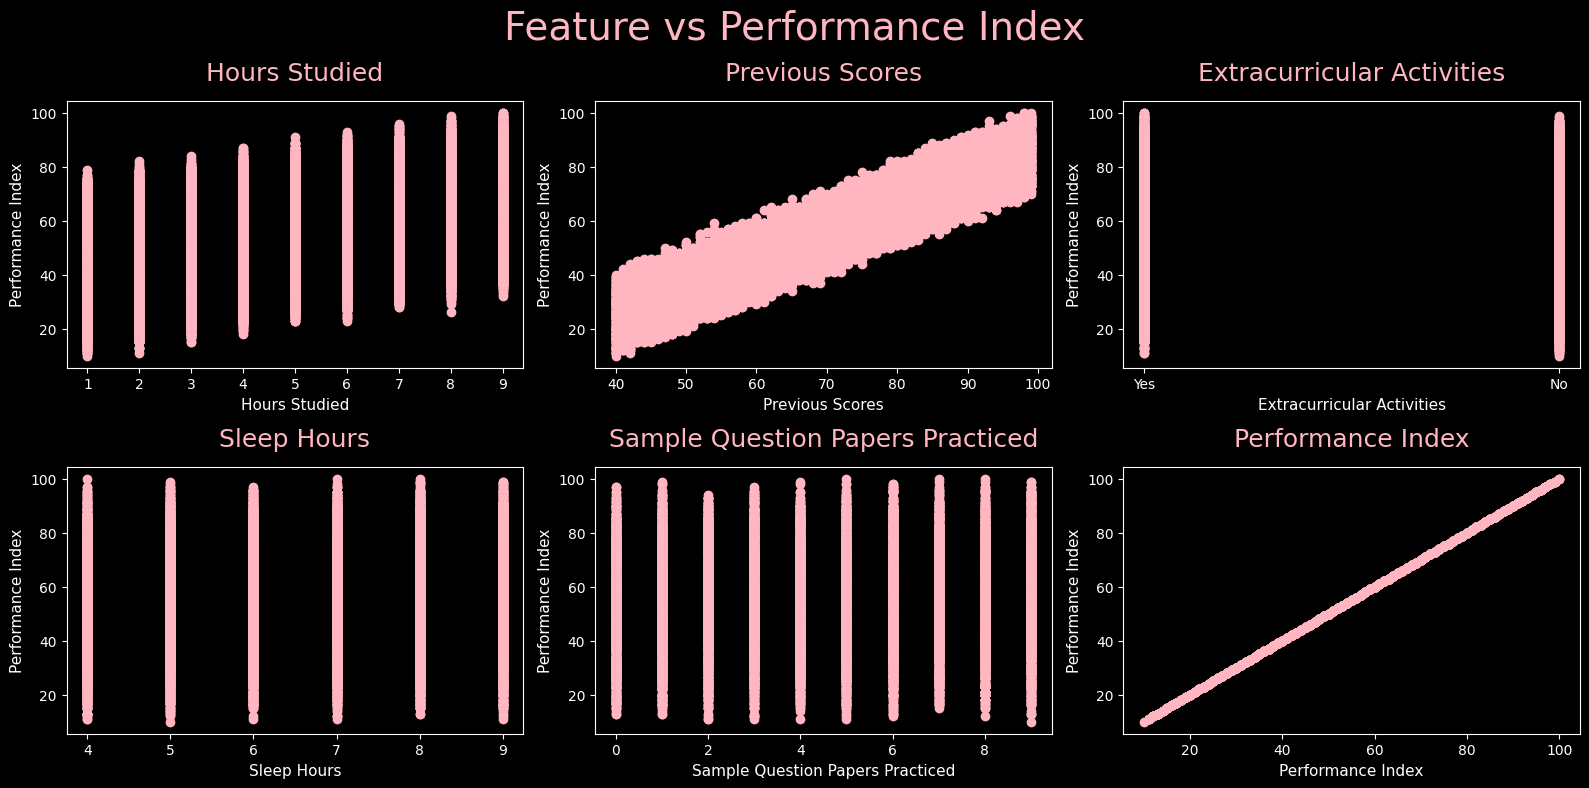

In [6]:
plt.figure(figsize=(16,8))

plt.suptitle("Feature vs Performance Index", fontsize=28, color="lightpink")

for index, column in enumerate(df.columns):
    plt.subplot(2,3,index+1)
    plt.scatter(df[column], df["Performance Index"], color="lightpink")
    plt.title(column, fontsize=18, color="lightpink", pad=15)
    plt.xlabel(xlabel=column, fontsize=11)
    plt.ylabel(ylabel="Performance Index", fontsize=11)
    plt.tight_layout()

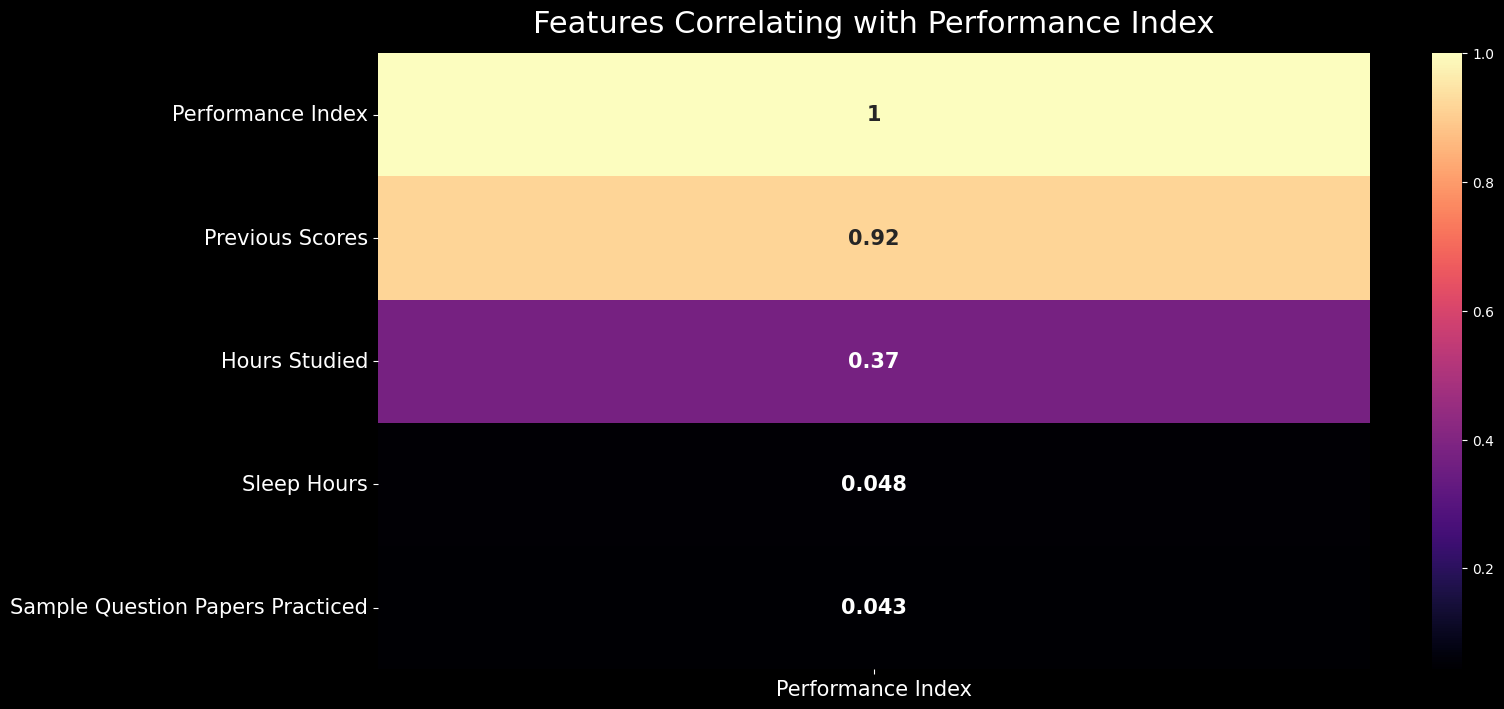

In [7]:
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(df[numeric_columns].corr()[["Performance Index"]].sort_values(by="Performance Index", ascending=False), 
                      annot=True, annot_kws={"fontsize":15, "weight": "bold"}, cmap="magma")
heatmap.set_title("Features Correlating with Performance Index", fontdict={"fontsize": 22}, pad=15)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15);

### "Previous Scores" has the highest correlation to the "Performance Index". "Hours Studied" is slightly correlated to the target variable too.

In [8]:
Extracurricular_Activities_Yes = pd.get_dummies(df["Extracurricular Activities"], drop_first=True)
df["Extracurricular Activities"] = Extracurricular_Activities_Yes
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  Sample Question Papers Practiced  Performance Index
0              7               99                        True            9                                 1               91.0
1              4               82                       False            4                                 2               65.0
2              8               51                        True            7                                 2               45.0
3              5               52                        True            5                                 2               36.0
4              7               75                       False            8                                 5               66.0


In [9]:
X = df.drop(columns=["Performance Index"]).values
y= df["Performance Index"].values

print(f"X:    {X}\n")
print("-----------------------\n")
print(f"y:    {y}")

X:    [[7 99 True 9 1]
 [4 82 False 4 2]
 [8 51 True 7 2]
 ...
 [6 83 True 8 5]
 [9 97 True 7 0]
 [7 74 False 8 1]]

-----------------------

y:    [91. 65. 45. ... 74. 95. 64.]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
sc_sklearn = StandardScaler()
sc_custom = SC()

X_train_sklearn = sc_sklearn.fit_transform(X=X_train)
X_train_custom = sc_custom.fit_transform(X=X_train)

X_test_sklearn = sc_sklearn.transform(X=X_test)
X_test_custom = sc_custom.transform(X=X_test)

In [12]:
print("X_train_custom == X_train_sklearn:\n")
print(X_train_custom == X_train_sklearn)
print("\n--------------------------\n")
print("X_test_custom == X_test_sklearn:\n")
print(X_test_custom == X_test_sklearn)

X_train_custom == X_train_sklearn:

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 ...
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]

--------------------------

X_test_custom == X_test_sklearn:

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 ...
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [13]:
lr_custom = LR()
lr_custom.fit(X_train=X_train_custom, y_train=y_train)
y_pred_custom = lr_custom.predict(X_test=X_test_custom)

In [14]:
lr_sklearn = LinearRegression()
lr_sklearn.fit(X=X_train_sklearn, y=y_train)
y_pred_sklearn = lr_sklearn.predict(X=X_test_sklearn)

In [15]:
RegressionMetrics.metrics_dataframe(y_true=y_test, y_pred=y_pred_custom)

,MSE,RMSE,MAE,R2
0,4.08,2.02,1.61,0.99


In [16]:
RegressionMetrics.metrics_dataframe(y_true=y_test, y_pred=y_pred_sklearn)

,MSE,RMSE,MAE,R2
0,4.08,2.02,1.61,0.99


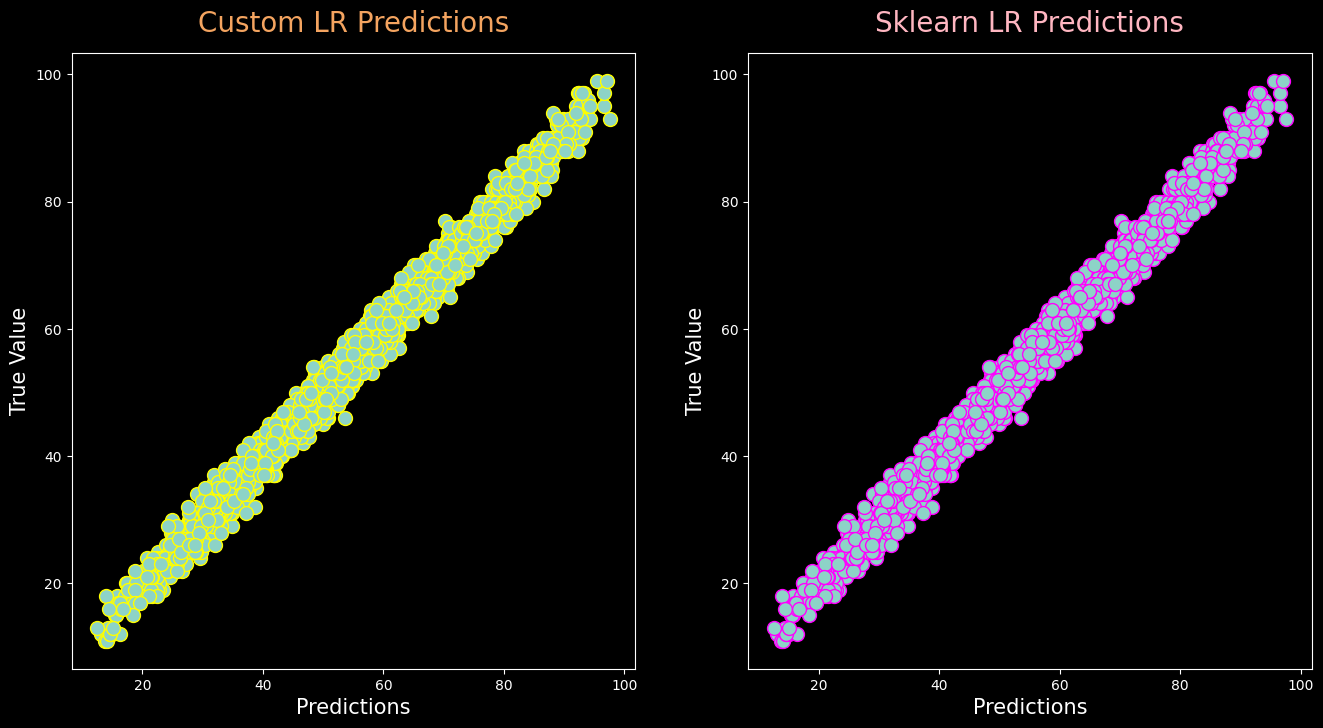

In [17]:
plt.figure(figsize=(16,8))

models = [{
    "y_pred": y_pred_custom,
    "color_title": "sandybrown",
    "label": "Custom",
    "edgecolors": "yellow"
},
{
    "y_pred": y_pred_sklearn,
    "color_title": "lightpink",
    "label": "Sklearn",
    "edgecolors": "magenta",
},
]

for index, model in enumerate(models):
    plt.subplot(1, 2, index+1)
    plt.scatter(model["y_pred"], y_test, marker="o", edgecolors=model["edgecolors"], s=100)
    plt.title(label=model["label"] + " LR Predictions", fontdict={"color": model["color_title"], "fontsize": 20}, pad=15)
    plt.xlabel(xlabel="Predictions", fontsize=15)
    plt.ylabel(ylabel="True Value", fontsize=15)

In [18]:
for model in models:
    print()
    print(f"{model["label"]} LR")
    print("--------------\n")
    print(f"MSE:     {mean_squared_error(y_true=y_test, y_pred=model["y_pred"]).round(2)}")
    print(f"RMSE:    {np.sqrt(mean_squared_error(y_true=y_test, y_pred=model["y_pred"]).round(2)).round(2)}")
    print(f"MAE:     {mean_absolute_error(y_true=y_test, y_pred=model["y_pred"]).round(2)}")
    print(f"R2:      {r2_score(y_true=y_test, y_pred=model["y_pred"]).round(2)}")


Custom LR
--------------

MSE:     4.08
RMSE:    2.02
MAE:     1.61
R2:      0.99

Sklearn LR
--------------

MSE:     4.08
RMSE:    2.02
MAE:     1.61
R2:      0.99


In [19]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming `y_train` are the actual values and `y_pred` are the predicted values
# residuals = y_test - y_pred_sklearn
# sns.residplot(x=y_pred_sklearn, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
# plt.xlabel('Fitted values')
# plt.ylabel('Residuals')
# plt.title('Residuals vs Fitted')
# plt.show()
